In [139]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import joblib


In [2]:
df = pd.read_csv('csvfile.csv')

In [3]:
df.head()

,Emotional Content,Recollection Accuracy,Visitor Empathy,Patient Interaction Level,Visitor Frequency,Recognized Visitor,Type of Relation,LDA Topic Relevance,Facial Expressions,Trust Rating
0,1,5,4,3,1,0,2,5,4,68
1,5,5,3,4,3,0,3,4,5,80
2,2,3,3,4,2,0,1,5,4,62
3,4,4,5,5,3,1,3,4,5,94
4,3,3,2,3,2,1,2,3,3,56


In [20]:
df.shape

(314, 10)

In [5]:
X = df.drop(['Trust Rating'], axis=1)
y = df['Trust Rating']

In [6]:
X.head()

,Emotional Content,Recollection Accuracy,Visitor Empathy,Patient Interaction Level,Visitor Frequency,Recognized Visitor,Type of Relation,LDA Topic Relevance,Facial Expressions
0,1,5,4,3,1,0,2,5,4
1,5,5,3,4,3,0,3,4,5
2,2,3,3,4,2,0,1,5,4
3,4,4,5,5,3,1,3,4,5
4,3,3,2,3,2,1,2,3,3


In [7]:
y.head()

0    68
1    80
2    62
3    94
4    56
Name: Trust Rating, dtype: int64

In [22]:
y_test.shape

(95,)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10, shuffle=True)

### Linear Regression

In [63]:
model = LinearRegression().fit(X_train, y_train)

In [64]:
y_ltrain_prediction = model.predict(X_train)

In [66]:
print("MAE on train data= " , metrics.mean_absolute_error(y_train, y_ltrain_prediction))

MAE on train data=  4.831246697546419


In [67]:
y_ltest_prediction = model.predict(X_test)

In [68]:
print("MAE on test data = " , metrics.mean_absolute_error(y_test, y_ltest_prediction))

MAE on test data =  4.876095596732683


In [140]:
filename = "linear_reg_model.joblib"
joblib.dump(model, filename)

['linear_reg_model.joblib']

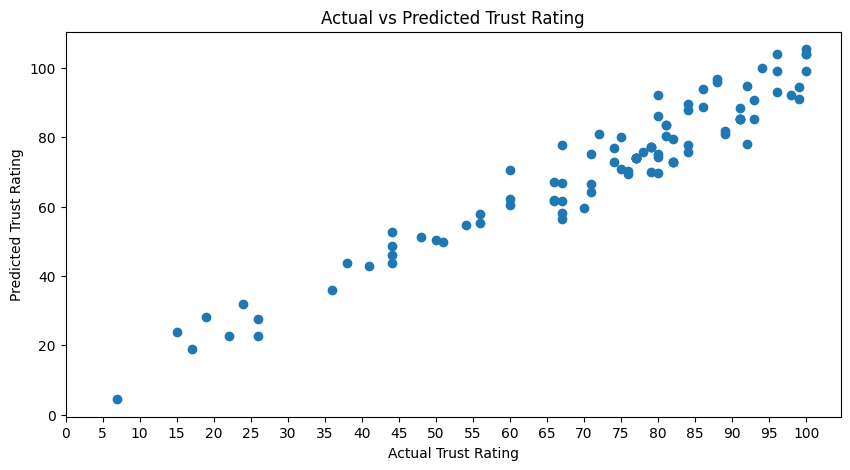

In [69]:
plt.figure(figsize = (10,5))
plt.scatter(y_test, y_ltest_prediction)
plt.xticks(np.arange(0, 101, 5.0))
plt.xlabel('Actual Trust Rating')
plt.ylabel('Predicted Trust Rating')
plt.title('Actual vs Predicted Trust Rating')
plt.show()

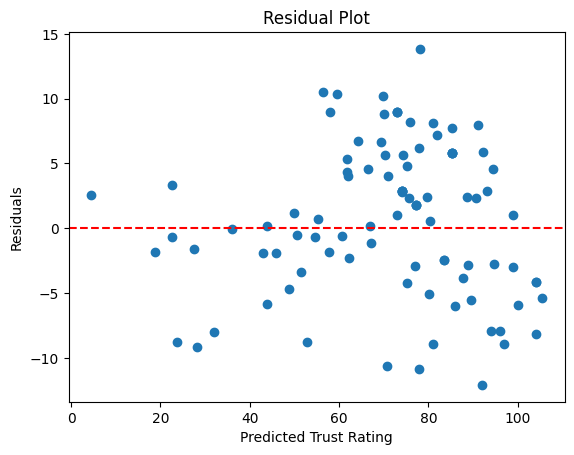

In [70]:
residuals = y_test - y_ltest_prediction
plt.scatter(y_ltest_prediction, residuals)
plt.xlabel('Predicted Trust Rating')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

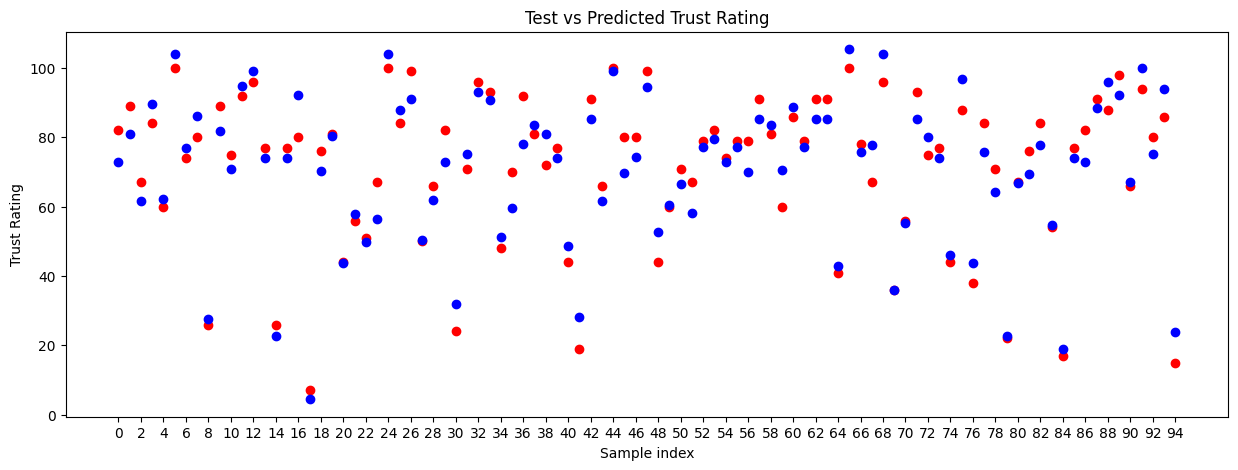

In [73]:
plt.figure(figsize = (15,5))
plt.scatter(range(95), y_test, color = 'red')
plt.scatter(range(95), y_ltest_prediction, color = 'blue')
plt.xticks(np.arange(0, 95, 2.0))
plt.title('Test vs Predicted Trust Rating')
plt.xlabel('Sample index')
plt.ylabel('Trust Rating')
plt.show()

### Ridge regression

In [74]:
from sklearn.linear_model import Ridge

In [75]:
clf = Ridge(alpha=1.0)
clf.fit(X_train, y_train)

Ridge()

In [76]:
y_rtrain_prediction = clf.predict(X_train)

In [77]:
print("MAE on train data= " , metrics.mean_absolute_error(y_train, y_rtrain_prediction))

MAE on train data=  4.844972959116693


In [78]:
y_rtest_prediction = clf.predict(X_test)

In [79]:
print("MAE on test data = " , metrics.mean_absolute_error(y_test, y_rtest_prediction))

MAE on test data =  4.882812895623084


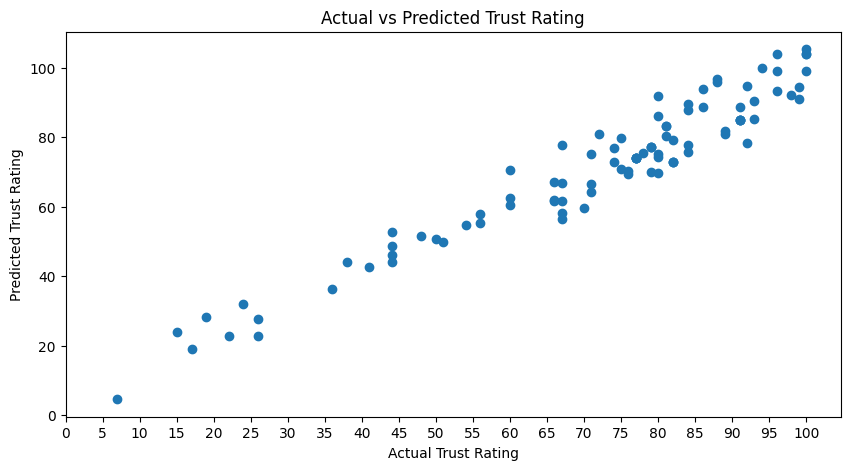

In [80]:
plt.figure(figsize = (10,5))
plt.scatter(y_test, y_rtest_prediction)
plt.xticks(np.arange(0, 101, 5.0))
plt.xlabel('Actual Trust Rating')
plt.ylabel('Predicted Trust Rating')
plt.title('Actual vs Predicted Trust Rating')
plt.show()

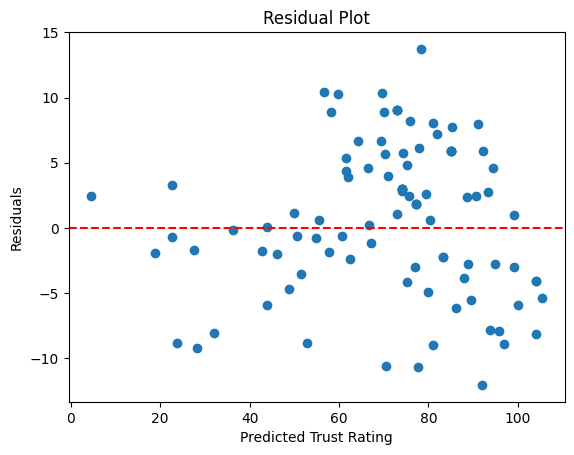

In [82]:
residuals = y_test - y_rtest_prediction
plt.scatter(y_rtest_prediction, residuals)
plt.xlabel('Predicted Trust Rating')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

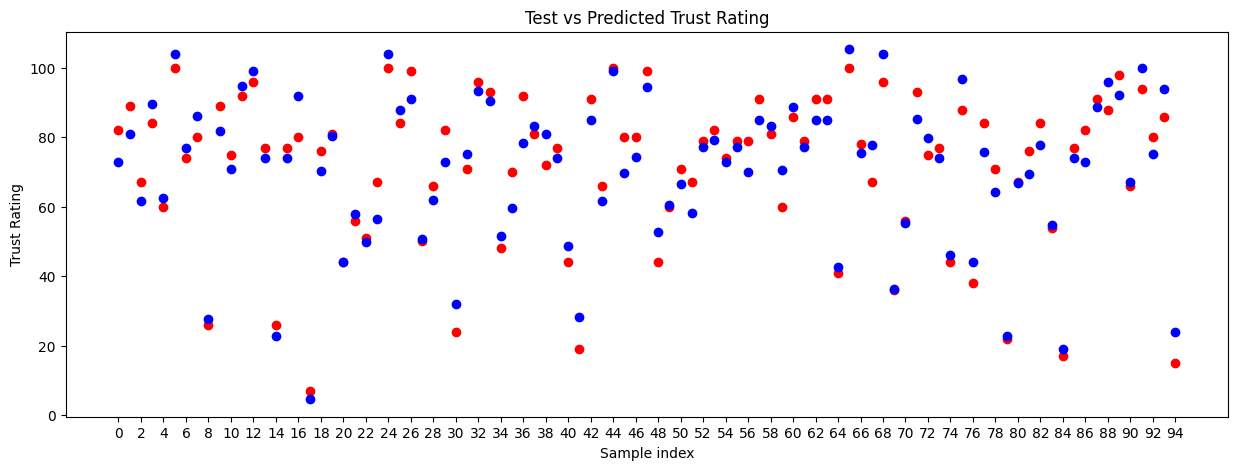

In [83]:
plt.figure(figsize = (15,5))
plt.scatter(range(95), y_test, color = 'red')
plt.scatter(range(95), y_rtest_prediction, color = 'blue')
plt.xticks(np.arange(0, 95, 2.0))
plt.title('Test vs Predicted Trust Rating')
plt.xlabel('Sample index')
plt.ylabel('Trust Rating')
plt.show()

### Lasso Regression

In [84]:
from sklearn.linear_model import Lasso

In [86]:
lasso = Lasso(alpha=0.1).fit(X_train, y_train)

In [87]:
y_latrain_prediction = lasso.predict(X_train)

In [88]:
print("MAE on train data= " , metrics.mean_absolute_error(y_train, y_latrain_prediction))

MAE on train data=  4.906141000037834


In [91]:
y_latest_prediction = lasso.predict(X_test)

In [92]:
print("MAE on test data = " , metrics.mean_absolute_error(y_test, y_latest_prediction))

MAE on test data =  4.939233255348207


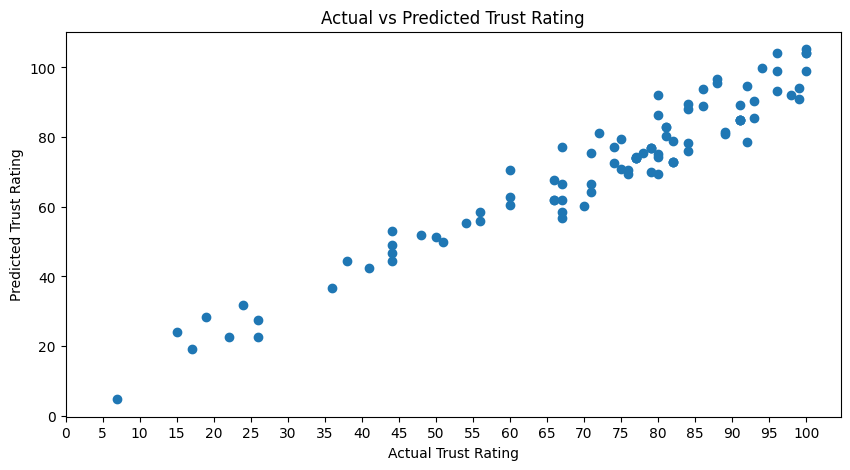

In [93]:
plt.figure(figsize = (10,5))
plt.scatter(y_test, y_latest_prediction)
plt.xticks(np.arange(0, 101, 5.0))
plt.xlabel('Actual Trust Rating')
plt.ylabel('Predicted Trust Rating')
plt.title('Actual vs Predicted Trust Rating')
plt.show()

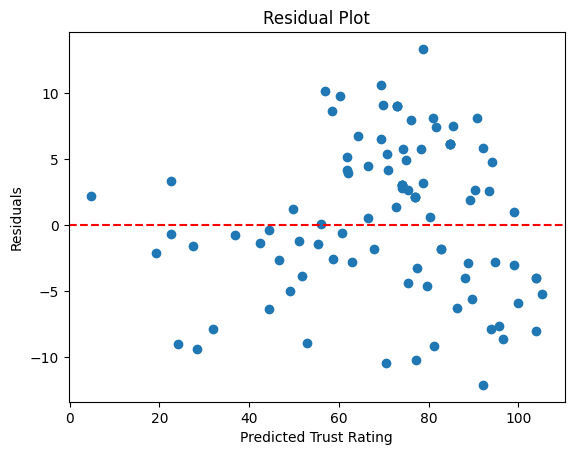

In [94]:
residuals = y_test - y_latest_prediction
plt.scatter(y_latest_prediction, residuals)
plt.xlabel('Predicted Trust Rating')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

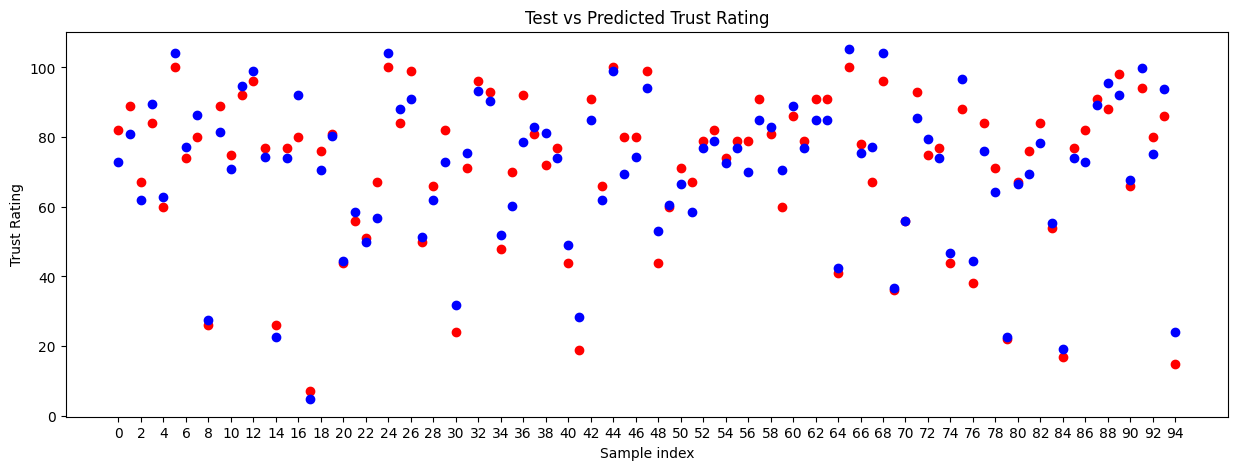

In [95]:
plt.figure(figsize = (15,5))
plt.scatter(range(95), y_test, color = 'red')
plt.scatter(range(95), y_latest_prediction, color = 'blue')
plt.xticks(np.arange(0, 95, 2.0))
plt.title('Test vs Predicted Trust Rating')
plt.xlabel('Sample index')
plt.ylabel('Trust Rating')
plt.show()

### ElasticNet

In [96]:
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression

In [129]:
regr = ElasticNet(random_state=0)
regr.fit(X_train, y_train)
print(regr.coef_)
print(regr.intercept_)


[1.20141759 3.5103717  3.90384356 3.49383825 2.79723423 0.99234142
 2.75598265 0.91890834 2.33397578]
7.145802128433928


In [130]:
y_etrain_prediction = regr.predict(X_train)

In [131]:
print("MAE on train data= " , metrics.mean_absolute_error(y_train, y_etrain_prediction))

MAE on train data=  6.089053252570472


In [132]:
y_etest_prediction = regr.predict(X_test)

In [133]:
print("MAE on test data = " , metrics.mean_absolute_error(y_test, y_etest_prediction))

MAE on test data =  6.177988596543015


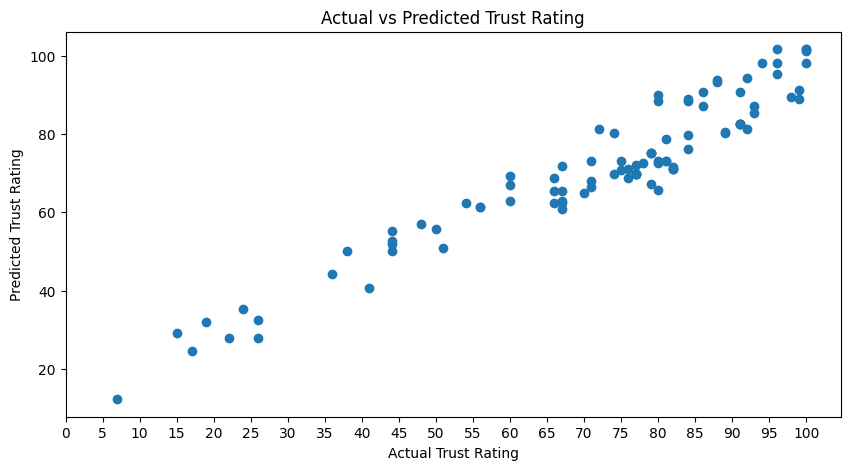

In [134]:
plt.figure(figsize = (10,5))
plt.scatter(y_test, y_etest_prediction)
plt.xticks(np.arange(0, 101, 5.0))
plt.xlabel('Actual Trust Rating')
plt.ylabel('Predicted Trust Rating')
plt.title('Actual vs Predicted Trust Rating')
plt.show()

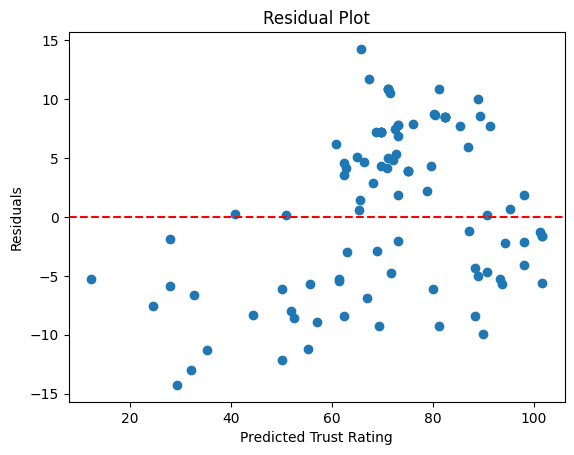

In [135]:
residuals = y_test - y_etest_prediction
plt.scatter(y_etest_prediction, residuals)
plt.xlabel('Predicted Trust Rating')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

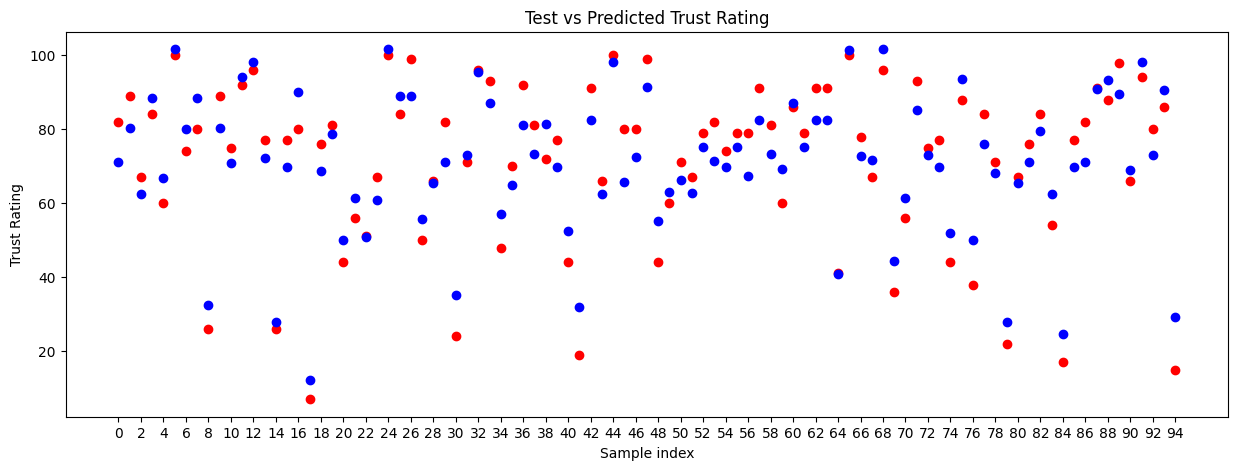

In [136]:
plt.figure(figsize = (15,5))
plt.scatter(range(95), y_test, color = 'red')
plt.scatter(range(95), y_etest_prediction, color = 'blue')
plt.xticks(np.arange(0, 95, 2.0))
plt.title('Test vs Predicted Trust Rating')
plt.xlabel('Sample index')
plt.ylabel('Trust Rating')
plt.show()